# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [87]:
# TODO: Import all necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score ,precision_score, recall_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression , LogisticRegression     
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [88]:
# TODO: Load regression dataset
# Load dataset
df_reg = pd.read_csv('insurance.csv')
# Shape print
print('Shape: ',df_reg.shape)
# Column print
print('Columns: ', df_reg.columns)

# target variable
target = df_reg['charges']
print('Target variable: ', target)

Shape:  (1338, 7)
Columns:  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Target variable:  0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


Descriptive statistic: 
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
Correlation Heatmap: 


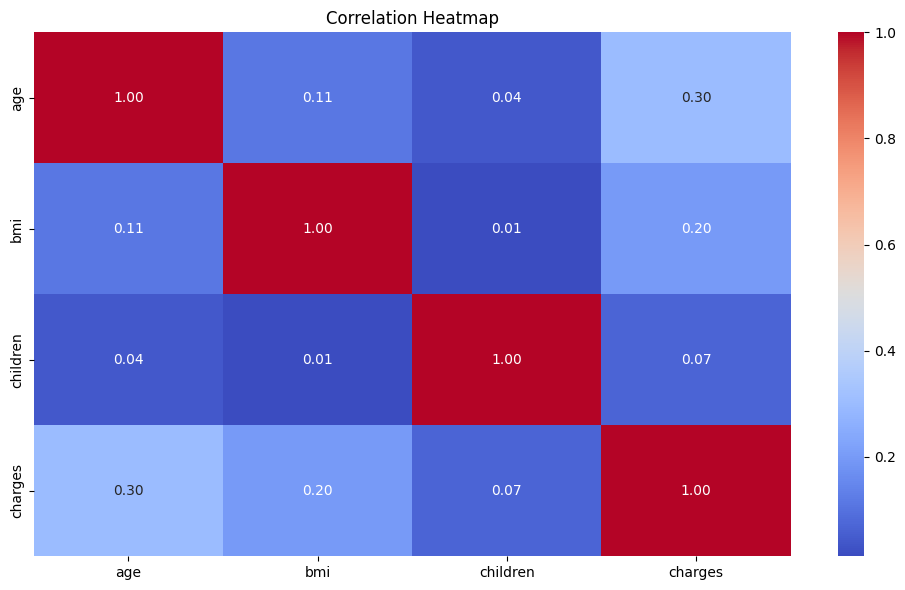

Feature vs target plot: 


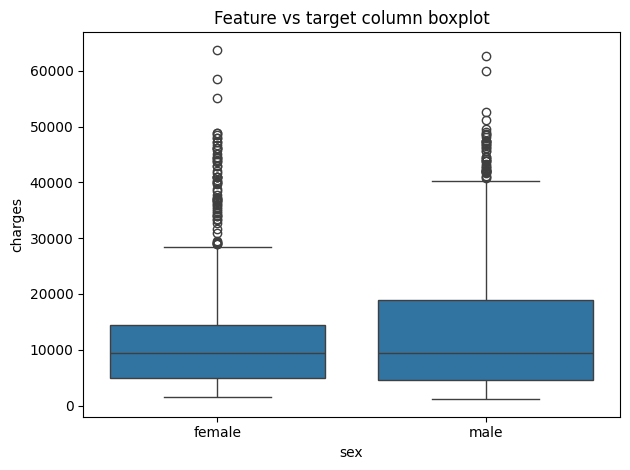

In [89]:
# TODO: Perform EDA

numeric_col = ['age','bmi','children']

# descriptive statistic
print('Descriptive statistic: \n', df_reg.describe())

# correlation
corr_matrix = df_reg[['age','bmi','children','charges']].corr()
# Correlation heatmap
print('Correlation Heatmap: ')
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# Feature vs target plot
print('Feature vs target plot: ')

sns.boxplot(y=df_reg['charges'],x=df_reg['sex'])
plt.title('Feature vs target column boxplot')
plt.tight_layout()
plt.show()

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [90]:
# TODO: Prepare features

#encoding categorical feature
encoded_df = pd.get_dummies(df_reg[['age','sex','bmi','children','smoker','region','charges']], drop_first=True,dtype=int)
X = encoded_df.drop(columns='charges')
y = encoded_df['charges']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

# Scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [91]:
# TODO: Multiple Linear Regression
lin_reg = LinearRegression()
# Fit model
lin_reg.fit(X_train, y_train)
# Predict
y_pred = lin_reg.predict(X_test)

# Calculate metrics
mae_lr = round(mean_absolute_error(y_test, y_pred) ,2)
rmse_lr = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
r2_lr = round(r2_score(y_test, y_pred),2)

print('RMSE = ', rmse_lr)
print('MAE = ', mae_lr)
print('R^2 = ', r2_lr)

RMSE =  5926.02
MAE =  4243.65
R^2 =  0.77


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [92]:
# TODO: Polynomial Regression

degrees = [1,2,3,5]

# for deg in degrees:
#     model = Pipeline([
#         ('Poly', PolynomialFeatures(degree=deg, include_bias=False)),
#         ('lin_reg', LinearRegression())
#     ])

#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)

#     mae = mean_absolute_error(y_test, y_pred) 
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)
#     print(f'For degree {deg}')
#     print('RMSE = ', rmse)
#     print('MAE = ', mae)
#     print('R^2 = ', r2)


model = Pipeline([
        ('Poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('lin_reg', LinearRegression())
    ])

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae_poly = round(mean_absolute_error(y_test, y_pred),2) 
rmse_poly = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
r2_poly = round(r2_score(y_test, y_pred),2)

print('RMSE = ', rmse_poly,2)
print('MAE = ', mae_poly)
print('R^2 = ', r2_poly)

# colpare to linear regression
compare_df = pd.DataFrame({
    'metrix': ['RMSE','MAE', 'R^2'],
    'Multiple Linear Reg': [rmse_lr, mae_lr, r2_lr],
    'Polynomiar Reg': [rmse_poly, mae_poly, r2_poly]
})
print('Compare Between Linear Regression and Polynomial Regression\n', compare_df)

RMSE =  4689.45 2
MAE =  2781.71
R^2 =  0.85
Compare Between Linear Regression and Polynomial Regression
   metrix  Multiple Linear Reg  Polynomiar Reg
0   RMSE              5926.02         4689.45
1    MAE              4243.65         2781.71
2    R^2                 0.77            0.85


## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [93]:
# TODO: Support Vector Regression
svr = SVR(kernel='rbf', C=100000, epsilon=.1, gamma='scale')
svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)

# Calculate metrics
mae_svr = round(mean_absolute_error(y_test, y_pred) ,2)
rmse_svr = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
r2_svr = round(r2_score(y_test, y_pred),2)

print('RMSE = ', rmse_svr)
print('MAE = ', mae_svr)
print('R^2 = ', r2_svr)

RMSE =  4724.4
MAE =  1808.94
R^2 =  0.85


## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [94]:
# TODO: Random Forest Regressor
model_rfr = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=42)

model_rfr.fit(X_train, y_train)
y_pred = model_rfr.predict(X_test)


mae_rfr = round(mean_absolute_error(y_test, y_pred),2) 
rmse_rfr = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
r2_rfr = round(r2_score(y_test, y_pred),2)

print('RMSE = ', rmse_rfr)
print('MAE = ', mae_rfr)
print('R^2 = ', r2_rfr)

RMSE =  4584.81
MAE =  2625.94
R^2 =  0.86


In [95]:
# Compare to all regression model 
compare_all = pd.DataFrame({
    'metrix': ['RMSE','MAE', 'R^2'],
    'Multiple Linear Reg': [rmse_lr, mae_lr, r2_lr],
    'Polynomiar Reg': [rmse_poly, mae_poly, r2_poly],
    'Support vector Reg': [rmse_svr, mae_svr, r2_svr],
    'Random Forest Reg': [rmse_rfr, mae_rfr, r2_rfr]
})
print('Compare Between all model (Multiple Linear Regression ,Polynomial Regression, Support vertor, Random forest)\n', compare_all)

Compare Between all model (Multiple Linear Regression ,Polynomial Regression, Support vertor, Random forest)
   metrix  Multiple Linear Reg  Polynomiar Reg  Support vector Reg  \
0   RMSE              5926.02         4689.45             4724.40   
1    MAE              4243.65         2781.71             1808.94   
2    R^2                 0.77            0.85                0.85   

   Random Forest Reg  
0            4584.81  
1            2625.94  
2               0.86  


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [96]:
# TODO: Load classification dataset

# Load data
df_clf = pd.read_csv('loan_data.csv')
print('Head or the dateset (5 row)')
print(df_clf.head(),'\n')

# distribution 
cat_col = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']
print('Categorical colum unique value')
print(df_clf[cat_col].nunique(),'\n')

# Imbalance
print('Imbalance of class variable ')
print(df_clf['loan_status'].value_counts())

Head or the dateset (5 row)
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


Plot class counts


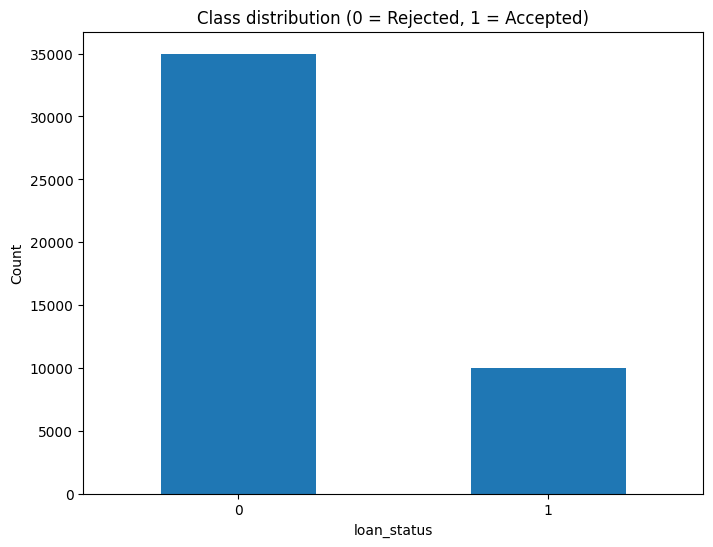

One feature  vs class plot 


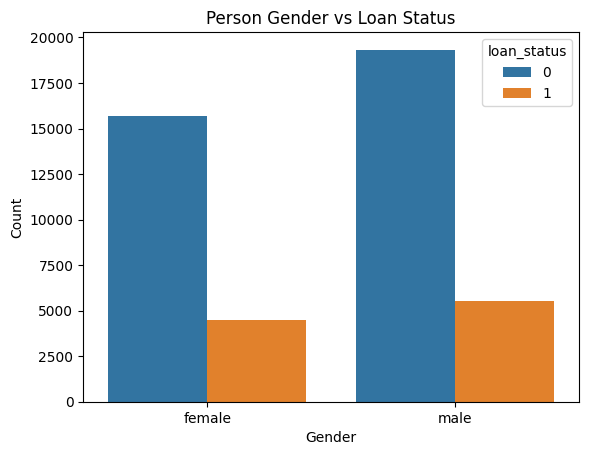

In [97]:
# TODO: Classification EDA

count = df_clf['loan_status'].value_counts()
# Plot class count
print('Plot class counts')
plt.figure(figsize=(8,6))
count.plot(kind='bar')
plt.xticks(ticks=[0,1],  rotation = 0)
plt.title('Class distribution (0 = Rejected, 1 = Accepted)')
plt.ylabel('Count')
plt.show()

print('One feature  vs class plot ')
sns.countplot(x='person_gender', hue='loan_status', data=df_clf)
plt.title("Person Gender vs Loan Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [98]:
# TODO: Prepare classification features

# Encoding 
cat_col = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']
df_clf_encoded = pd.get_dummies(df_clf, columns=cat_col, drop_first=True, dtype=int)

X = df_clf_encoded.drop(columns='loan_status')
y = df_clf_encoded['loan_status']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42, stratify=y)

# scaling
X_train_scaled_clf = scaler.fit_transform(X_train)
X_test_scaled_clf = scaler.transform(X_test)


## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


Accuracy Score =  0.9
Precission =  0.78
Recall =  0.74
confusion_matrix: 
 [[9889  611]
 [ 785 2215]]


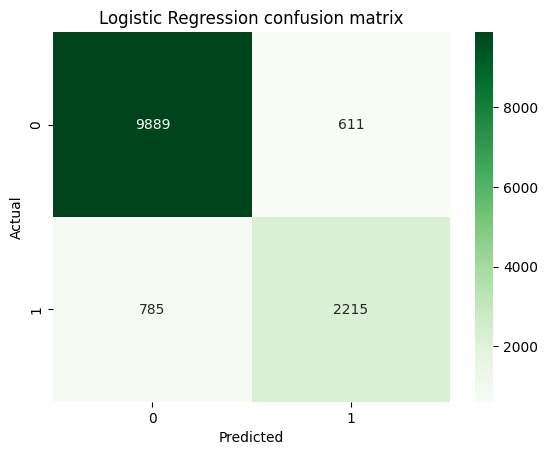

In [99]:
# TODO: Logistic Regression
log_reg = LogisticRegression(penalty='l2',max_iter=100)

# fit model
log_reg.fit(X_train_scaled_clf, y_train)
y_pred = log_reg.predict(X_test_scaled_clf)

# evaluate
acc_log_reg = round(accuracy_score(y_test, y_pred),2)
prec_log_reg = round(precision_score(y_test, y_pred),2)
recall_log_reg = round(recall_score(y_test, y_pred),2)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy Score = ', acc_log_reg)
print('Precission = ', prec_log_reg)
print('Recall = ', recall_log_reg)
print('confusion_matrix: \n',cm)

# confusion matrix visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression confusion matrix')
plt.show()


## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


Accuracy Score =  0.91
Precission =  0.85
Recall =  0.75
confusion_matrix: 
 [[10092   408]
 [  745  2255]]


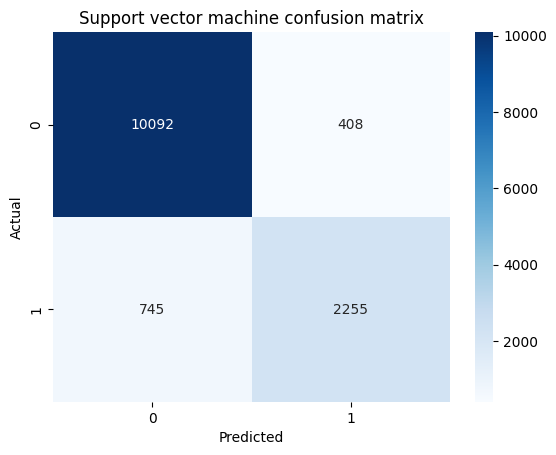

In [100]:
# TODO: SVM Classification

svc = SVC(kernel='rbf', C=1.0, gamma = 'scale', random_state=42)

svc.fit(X_train_scaled_clf, y_train)

y_pred = svc.predict(X_test_scaled_clf)

# evaluate
acc_svc = round(accuracy_score(y_test, y_pred),2)
prec_svc = round(precision_score(y_test, y_pred),2)
recall_svc = round(recall_score(y_test, y_pred),2)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy Score = ', acc_svc)
print('Precission = ', prec_svc)
print('Recall = ', recall_svc)
print('confusion_matrix: \n',cm)

# confusion matrix visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support vector machine confusion matrix')
plt.show()

## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



Accuracy Score =  0.87
Precission =  0.7
Recall =  0.7
confusion_matrix: 
 [[9594  906]
 [ 903 2097]]


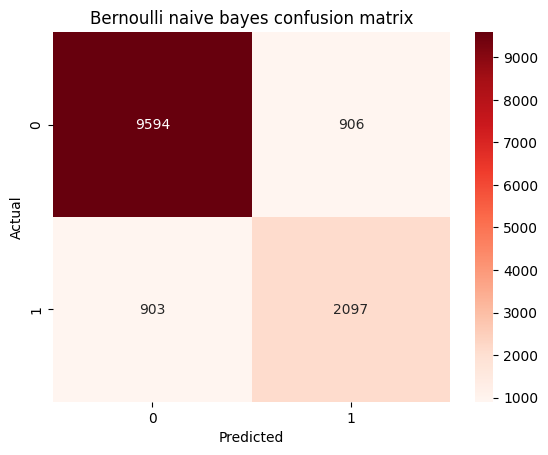

In [101]:
# TODO: Naive Bayes

# fit model
nb = BernoulliNB()
nb.fit(X_train_scaled_clf, y_train)

y_pred = nb.predict(X_test_scaled_clf)

# evaluate
acc_nb = round(accuracy_score(y_test, y_pred),2)
prec_nb = round(precision_score(y_test, y_pred),2)
recall_nb = round(recall_score(y_test, y_pred),2)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy Score = ', acc_nb)
print('Precission = ', prec_nb)
print('Recall = ', recall_nb)
print('confusion_matrix: \n',cm)

# confusion matrix visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Bernoulli naive bayes confusion matrix')
plt.show()

## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


Best K (by this demo): 29
Best accuracy: 0.894962962962963
accuracy vs k plot


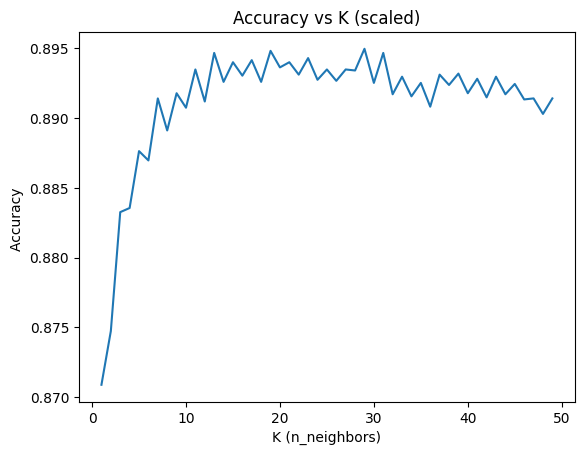

In [102]:
# TODO: KNN

k_values = range(1,50)
accs = []

for k in k_values:
  knn =  KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled_clf, y_train)
  pred = knn.predict(X_test_scaled_clf)
  accs.append(accuracy_score(y_test, pred))


best_k = list(k_values)[int(np.argmax(accs))]
print("Best K (by this demo):", best_k)
print("Best accuracy:", float(np.max(accs)))



# accuracy vs k plot
print('accuracy vs k plot')
plt.figure()
plt.plot(list(k_values), accs)
plt.xlabel('K (n_neighbors)')
plt.ylabel('Accuracy ')
plt.title('Accuracy vs K (scaled)')
plt.show()

In [103]:
# best k model fit for evalute
knn =  KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled_clf, y_train)
y_pred = knn.predict(X_test_scaled_clf)

acc_knn = round(accuracy_score(y_test, y_pred),2)
prec_knn = round(precision_score(y_test, y_pred),2)
recall_knn = round(recall_score(y_test, y_pred),2)


## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [104]:
# TODO: Random Forest Classifier

rfc = RandomForestClassifier(
    n_estimators=10,
    random_state=42
)

rfc.fit(X_train_scaled_clf, y_train)
y_pred = rfc.predict(X_test_scaled_clf)

# evaluate metric
acc_rfc = round(accuracy_score(y_test, y_pred),2)
prec_rfc = round(precision_score(y_test, y_pred),2)
recall_rfc = round(recall_score(y_test, y_pred),2)

print('Accuracy Score = ', acc_rfc)


# importace feature 
importances = pd.Series(
    rfc.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)

Accuracy Score =  0.92


previous_loan_defaults_on_file_Yes    0.215720
loan_percent_income                   0.173894
loan_int_rate                         0.158669
person_income                         0.120286
person_home_ownership_RENT            0.073907
credit_score                          0.053639
loan_amnt                             0.051507
person_age                            0.028154
person_emp_exp                        0.027093
cb_person_cred_hist_length            0.024478
dtype: float64

In [105]:
# Compare al classification model
compare_all_classification = pd.DataFrame({
    'metrix': ['Accuracy Score','Precission', 'Recall'],
    'Logistic Regression': [acc_log_reg, prec_log_reg, recall_log_reg],
    'Support vector classifier': [acc_svc, prec_svc, recall_svc],
    'Naive bayes classifier': [acc_nb, prec_nb, recall_nb],
    'KNN': [acc_knn, prec_knn, recall_knn],
    'Random Forest': [acc_rfc, prec_rfc, recall_rfc]
})
print('Compare Between all Classifier model \n', compare_all_classification)

Compare Between all Classifier model 
            metrix  Logistic Regression  Support vector classifier  \
0  Accuracy Score                 0.90                       0.91   
1      Precission                 0.78                       0.85   
2          Recall                 0.74                       0.75   

   Naive bayes classifier   KNN  Random Forest  
0                    0.87  0.89           0.92  
1                    0.70  0.86           0.88  
2                    0.70  0.62           0.73  


# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here
1. Best regression model is Random Forest Regression. Because here we find the lowest RMSE (4584.81) and r2 score (.86) compare to another 
    model, but MAE (2625.94) is more compare to support vector. But we can choice Random Forest Regression is best model here.
2. Random Forest Classifier is best model. Because high accuracy (92%) , high precission (88%) but recall(73%) is small low. So we can say Random Forest classifier is best classifier here
